In [1]:
import cv2
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

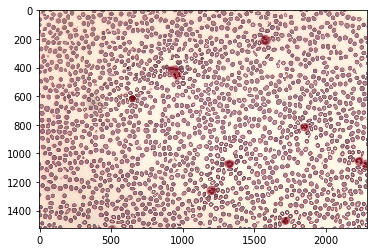

In [2]:
img = cv2.imread('/home/bumsoo/Data/test/CT_20/TEST1.png')
imshow(img)

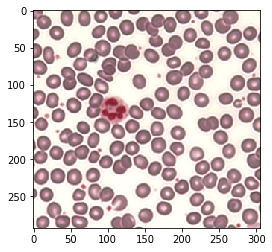

In [3]:
sample_img = cv2.imread('/home/bumsoo/Workspace/samples/full_image_1.png')
imshow(sample_img)

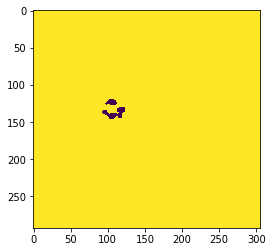

In [22]:
ret, thresh = cv2.threshold(cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
                           , 70, 255, cv2.THRESH_BINARY_INV)
thresh = np.invert(thresh)
imshow(thresh)

In [10]:
_, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
background = sample_img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(background, (x,y), (x+w,y+h), (0,255,0), 2)

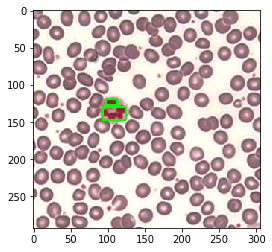

In [11]:
imshow(background)

In [18]:
ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                           , 60, 255, cv2.THRESH_BINARY)
thresh = np.invert(thresh)

_, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

original_img = img.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    
    if area > 20**2:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(original_img, (x,y), (x+w,y+h), (0,255,0), 2)

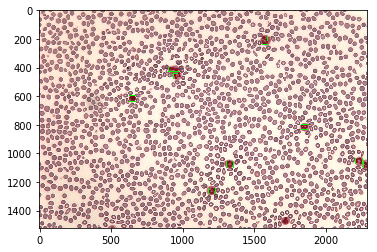

In [19]:
imshow(original_img)

In [20]:
cv2.imwrite('final_result.png', original_img)

True